In [1]:
# initialization
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # Makes the images look nice
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.visualization import plot_histogram

In [10]:
# nQubits = 2 # number of physical qubits used to represent s
# nQubits = 4 # number of physical qubits used to represent s
nQubits = 10 # number of physical qubits used to represent s
# s = 3       # the hidden integer 
# s = 11
s = 949

# make sure that a can be represented with nqubits
s = s % 2**(nQubits)

In [18]:
# Creating registers
# qubits for querying the oracle and finding the hidden integer
qr = QuantumRegister(nQubits)
# bits for recording the measurement on qr
cr = ClassicalRegister(nQubits)

bvCircuit = QuantumCircuit(qr, cr)
barriers = True

# my lines------------
# instatiate half of the bits as 1
# for i in range( int(nQubits/2)):
#     bvCircuit.x(qr[i])
# my lines------------

# Apply Hadamard gates before querying the oracle
for i in range(nQubits):
    bvCircuit.h(qr[i])
    
# Apply barrier 
if barriers:
    bvCircuit.barrier()

# Apply the inner-product oracle
for i in range(nQubits):
    if (s & (1 << i)):
        bvCircuit.z(qr[i])
    else:
        bvCircuit.iden(qr[i])
        
# Apply barrier 
if barriers:
    bvCircuit.barrier()

#Apply Hadamard gates after querying the oracle
for i in range(nQubits):
    bvCircuit.h(qr[i])
    
# Apply barrier 
if barriers:
    bvCircuit.barrier()

# Measurement
bvCircuit.measure(qr, cr)

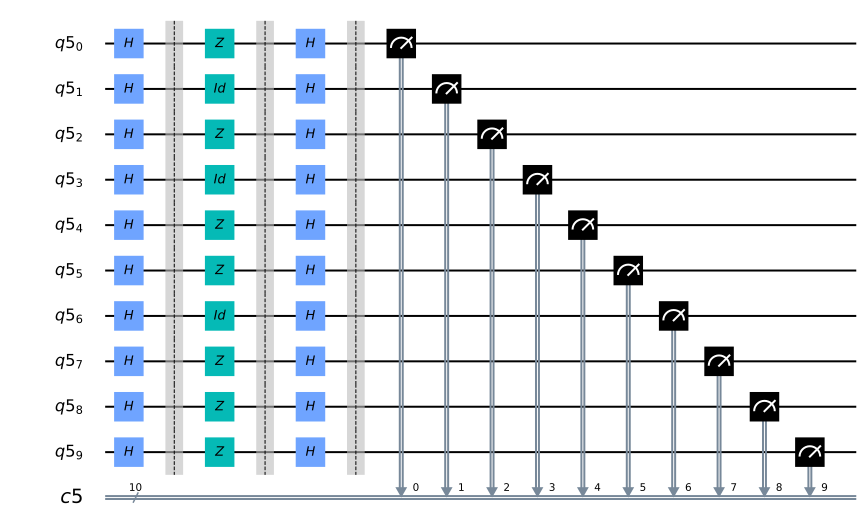

In [19]:
bvCircuit.draw(output='mpl')

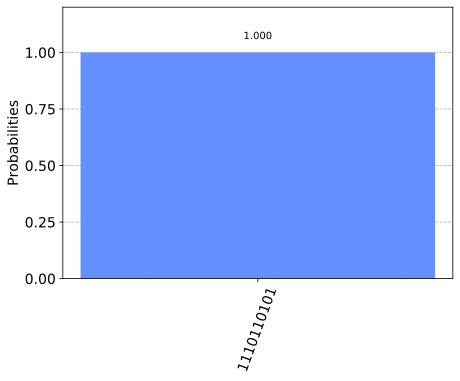

In [20]:
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(bvCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [ ]:
# # Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
# IBMQ.load_account()
# provider = IBMQ.get_provider(hub='ibm-q')
# provider.backends()
# backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits <= 5 and
#                                    x.configuration().n_qubits >= 2 and
#                                    not x.configuration().simulator and x.status().operational==True))
# print("least busy backend: ", backend)

In [ ]:
# # Run our circuit on the least busy backend. Monitor the execution of the job in the queue
# from qiskit.tools.monitor import job_monitor

# shots = 1024
# job = execute(bvCircuit, backend=backend, shots=shots)

# job_monitor(job, interval = 2)

In [ ]:
# # Get the results from the computation
# results = job.result()
# answer = results.get_counts()

# plot_histogram(answer)